# Supervised Machine Learning Project
## Predicting Online Consumer Behavior
This project aims to predict online consumer behavior by analyzing various features such as ... (mention features). The target variable is 'Revenue', which indicates whether a session resulted in shopping or not.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("online_shoppers_intention.csv")
# Display the first few rows of the dataset
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Categorical features to be one-hot encoded
categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType', 'Weekend']


# Continuous/numerical features to be scaled
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


# Constructing the column transformer that will allow us to preprocess the dataframe
categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore', drop="if_binary"))
numerical_transformer = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((numerical_transformer, numerical_features), 
                                       (categorical_transformer, categorical_features)) 

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("Revenue", axis=1)
y = df["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth=10, 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=100,
    random_state=0,
    class_weight='balanced'
)

In [5]:
# Create pipelines
pipeline_rf = make_pipeline(preprocessor, rf)

In [6]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'Month',
                                                   'VisitorType',
                                                   'Weekend'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=5, random_state=0))])

In [7]:
# Predictions
y_pred_rf = pipeline_rf.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Calculate Precision
precision = precision_score(y_test, y_pred_rf, pos_label=True)

# Calculate Recall
recall = recall_score(y_test, y_pred_rf, pos_label=True)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf, pos_label=True)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Displaying the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")

Accuracy: 0.8742903487429035
Precision: 0.6007194244604317
Recall: 0.7914691943127962
F1 Score: 0.6830265848670757
Confusion Matrix: 
[[1822  222]
 [  88  334]]


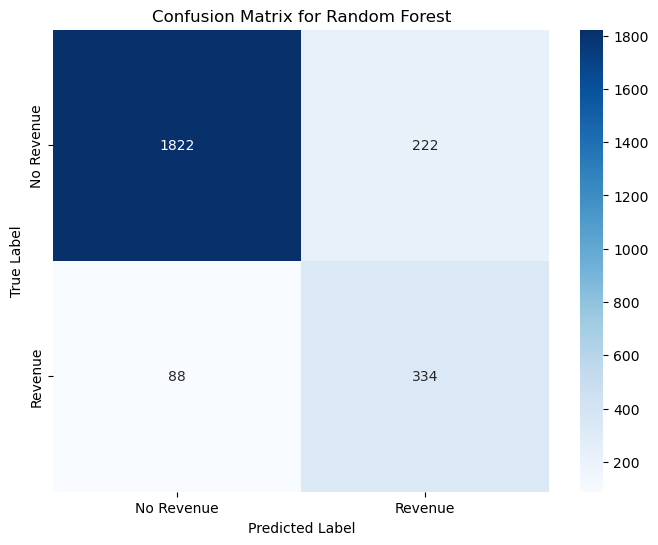

In [9]:
# Calculate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

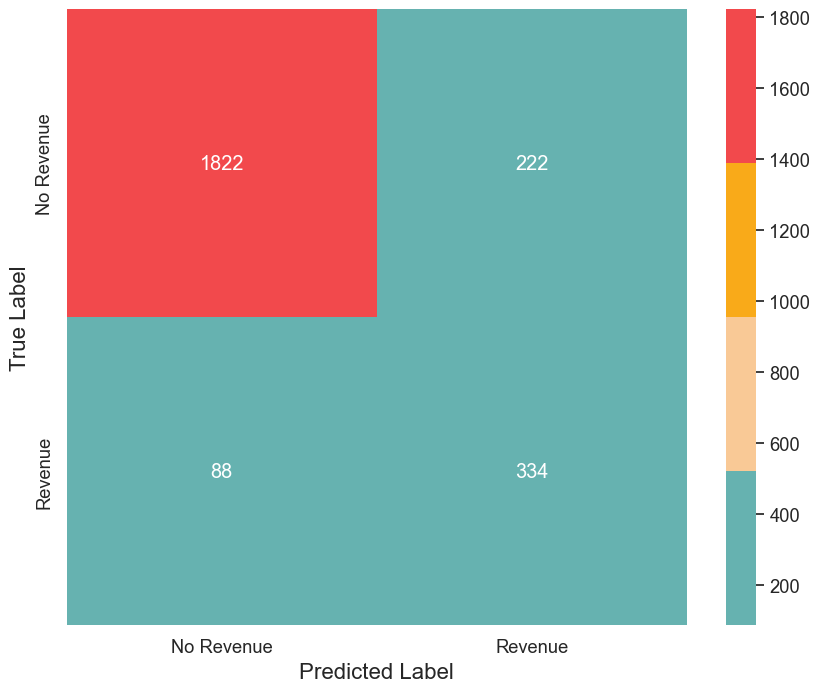

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Assuming y_test and y_pred_rf are available
# ...

# Specified colors
colors = ['#66b2b0', '#f9c996', '#f9aa19', '#f2494c']

# Calculate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_rf, 
    annot=True, 
    fmt='d', 
    cmap=ListedColormap(colors), 
    xticklabels=['No Revenue', 'Revenue'], 
    yticklabels=['No Revenue', 'Revenue']
)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.show()